In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('Resources/lax_temperature.csv')
temperature_df.head()

,STATION,DATE,REPORT_TYPE,HourlyDryBulbTemperature
0,72295023174,2019-01-01T00:49:00,FM-16,52
1,72295023174,2019-01-01T00:53:00,FM-15,51
2,72295023174,2019-01-01T01:53:00,FM-15,52
3,72295023174,2019-01-01T02:53:00,FM-15,49
4,72295023174,2019-01-01T03:53:00,FM-15,43


In [3]:
temperatures = temperature_df['HourlyDryBulbTemperature']
temperatures

0       52
1       51
2       52
3       49
4       43
        ..
3524    60
3525    59
3526    58
3527    58
3528    58
Name: HourlyDryBulbTemperature, Length: 3529, dtype: int64

In [4]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = st.mode(temperatures)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

The mean temperature at the LAX airport is 57.65514310002834
The median temperature at the LAX airport is 57.0
The mode temperature at the LAX airport is ModeResult(mode=57, count=327)


In [6]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   STATION                   3529 non-null   int64 
 1   DATE                      3529 non-null   object
 2   REPORT_TYPE               3529 non-null   object
 3   HourlyDryBulbTemperature  3529 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 110.4+ KB


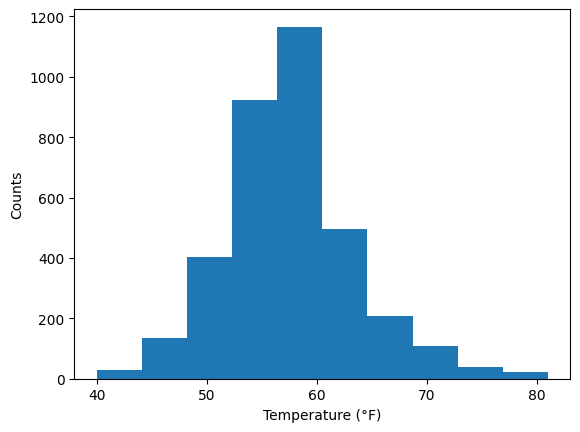

NormaltestResult(statistic=18.510590155586804, pvalue=9.560407839384394e-05)


In [6]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(temperatures.sample(50)))

In [5]:
# Run the normality test on the whole temperatures DataFrame.
print(st.normaltest(temperatures.sample(3529)))

NormaltestResult(statistic=202.53753937770153, pvalue=1.0460010849583278e-44)


In [8]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof=0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 32.33077618382964
The population standard deviation using the NumPy module is 5.686015844493369


In [7]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 51.969 and 63.341
Roughly 95% of the data is between 46.283 and 69.027
Roughly 99.7% of the data is between 40.597 and 74.713


In [8]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0      -0.994570
1      -1.170440
2      -0.994570
3      -1.522181
4      -2.577401
          ...   
3524    0.412390
3525    0.236520
3526    0.060650
3527    0.060650
3528    0.060650
Name: HourlyDryBulbTemperature, Length: 3529, dtype: float64
